<a href="https://colab.research.google.com/github/KaioDK/AnaliseDeDados/blob/main/Analise_de_Dados_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Airbnb New York City Listings  (Aluguéis de curta duração em NYC)

# **1. Definição do Problema:**
Qual a questão a ser resolvida? O que esperamos descobrir com a análise?

1. Qual é a relação entre o preço das acomodações e o tipo de quarto?

2. Quais bairros têm as acomodações mais caras em média?

3. Como o número de avaliações varia entre os diferentes tipos de quarto?









#Significado das colunas

*   id: ID único de cada anúncio.
* name: Nome do anúncio ou título do imóvel.
* host_id: ID do anfitrião (proprietário ou gerente do imóvel).
* host_name: Nome do anfitrião.
* neighbourhood_group: Grupo de vizinhança principal em que o imóvel está
* localizado (ex: Brooklyn, Manhattan, etc.).
* neighbourhood: Nome do bairro específico dentro do grupo de vizinhança.
* latitude: Latitude da localização do imóvel.
* longitude: Longitude da localização do imóvel.
* room_type: Tipo de quarto ou imóvel, como:
* Entire home/apt: Imóvel inteiro.
* Private room: Quarto privado.
* Shared room: Quarto compartilhado.
* price: Preço por noite (em dólares) para a estadia no imóvel.
* minimum_nights: Número mínimo de noites exigidas para reserva.
* number_of_reviews: Total de avaliações feitas pelos hóspedes no anúncio.
* last_review: Data da última avaliação recebida.
* reviews_per_month: Média de avaliações recebidas por mês.
* calculated_host_listings_count: Número total de listagens ativas que o
* anfitrião possui.
* availability_365: Número de dias em que o imóvel está disponível para reserva durante o ano.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#2.Coleta de dados


In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/KaioDK/AnaliseDeDados/refs/heads/main/AB_NYC_2019.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


#Carregar e visualizar os dados

In [7]:
df.isnull().sum()

,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


#Limpeza dos dados

In [9]:
#remove  as linhas que tenham algum valor ausente
df = df.dropna()

#remove duplicatas
df = df.drop_duplicates()

In [10]:
td = df.duplicated().sum()
print(f"Quanidade de duplicatas encontradas: {td}")

df = df.drop_duplicates()

print(f"Quantidade de duplicatas após a remoção: {df.duplicated().sum()}")

Quanidade de duplicatas encontradas: 0
Quantidade de duplicatas após a remoção: 0


In [11]:
td = df.dropna().sum()
print(f"Total de dados nulos encontrados: {td}")

df = df.dropna()
print(f"Total de dados nulos pós remoção: {df.dropna().sum()}")

Total de dados nulos encontrados: id                                                                     702691475726
name                              Clean & quiet apt home by the parkSkylit Midto...
host_id                                                               2494086925306
host_name                         JohnJenniferLisaRoxanneLauraChrisGaronShunichi...
neighbourhood_group               BrooklynManhattanBrooklynManhattanManhattanBro...
neighbourhood                     KensingtonMidtownClinton HillEast HarlemMurray...
latitude                                                              1581106.70078
longitude                                                            -2870857.54827
room_type                         Private roomEntire home/aptEntire home/aptEnti...
price                                                                       5525491
minimum_nights                                                               227849
number_of_reviews                         

#Visualização de dados


Perfunta 1: Qual é a relação entre o preço das acomodações e o tipo de quarto?

In [14]:
#Filtrar preços para evitar outliers que dificultam visualização
filtro_preco = df[df['price'] < 500]

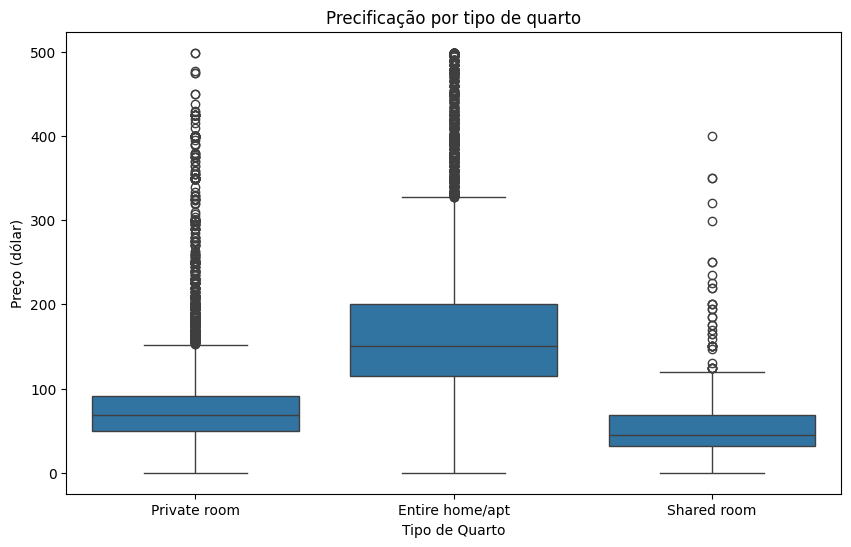

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtro_preco, x='room_type', y='price')
plt.title('Precificação por tipo de quarto')
plt.xlabel('Tipo de Quarto')
plt.ylabel('Preço (dólar)')
plt.show()

Pergunta 2: Quais bairros têm as acomodações mais caras em média?

In [17]:
preco_vizinhanca = df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).head(15)

<ipython-input-19-055f4bc0bc4a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = preco_vizinhanca.values, y = preco_vizinhanca.index, palette="viridis")


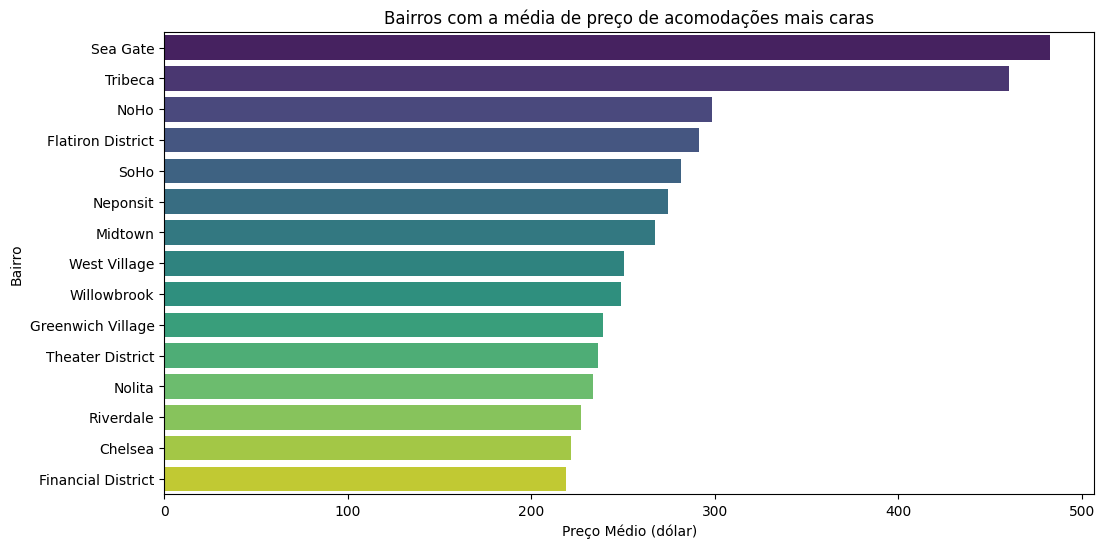

In [19]:
plt.figure(figsize=(12, 6))
sns.barplot(x = preco_vizinhanca.values, y = preco_vizinhanca.index, palette="viridis")
plt.title('Bairros com a média de preço de acomodações mais caras')
plt.xlabel('Preço Médio (dólar)')
plt.ylabel('Bairro')
plt.show()

Pergunta 3: Como o número de avaliações varia entre os diferentes tipos de quarto?

In [21]:
total_avaliacoes = df.groupby('room_type')['number_of_reviews'].sum()

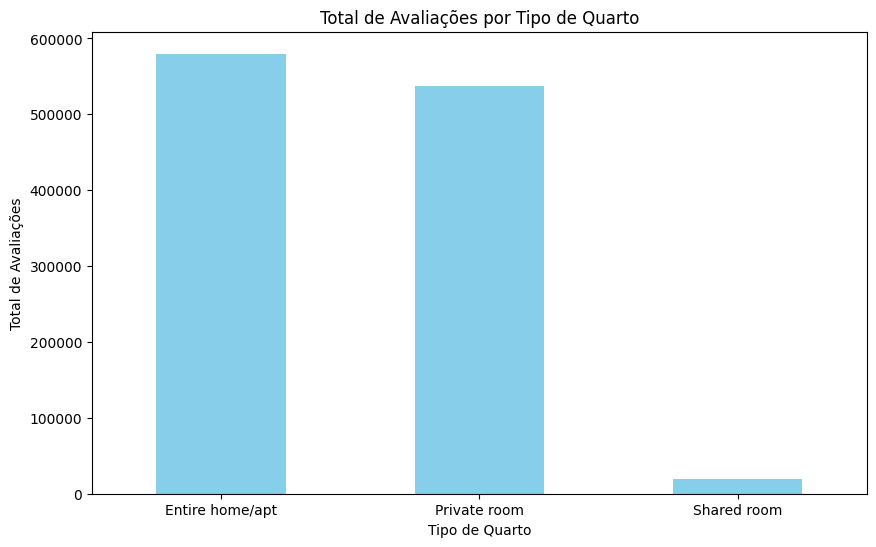

In [22]:
plt.figure(figsize=(10, 6))
total_avaliacoes.plot(kind='bar', color='skyblue')
plt.title('Avaliações por tipo de quarto')
plt.xlabel('Tipo de Quarto')
plt.ylabel('Total de Avaliações')
plt.xticks(rotation=0)
plt.show()

#Conclusão da Análise do Conjunto de Dados do Airbnb em Nova York
A análise do conjunto de dados do Airbnb em Nova York nos deu uma visão fascinante sobre como funcionam as acomodações na cidade. Aqui estão algumas das principais descobertas que emergiram dessa investigação:

1. Preços das Acomodações:

* Ao analisar os preços de acordo com o tipo de acomodação, é evidente que os apartamentos apresentam valores mais altos em comparação aos quartos privados e compartilhados. Isso se deve ao fato de que os viajantes valorizam consideravelmente a privacidade, o que torna o custo adicional mais justificável.

2. Bairros Mais Caros:

* Ao analisar os preços médios por bairro, observamos que algumas áreas, como Manhattan, se destacam com os valores mais elevados. Isso se deve à sua localização central, proximidade de atrações turísticas e grande variedade de serviços, fatores que tornam essas regiões altamente procurada.

3. Distribuição de Avaliações:

* Quando olhamos para o número de avaliações, percebemos que diferentes tipos de acomodação atraem quantidades variadas de feedback. Os gráficos mostram que quartos privados e inteiros recebem mais avaliações, o que pode indicar que esses tipos de hospedagem geralmente oferecem uma experiência mais agradável para os hóspedes ou simplesmente estão mais disponíveis para quem procura.

4. Popularidade dos Tipos de Quarto:

* A análise das avaliações mostrou que a popularidade dos tipos de acomodação pode variar bastante. Os quartos privados por exemplo, parecem ser uma excelente opção, equilibrando conforto e preço, o que atrai mais hóspedes e por consequência gera mais feedback.
Essas descobertas são muito úteis tanto para os anfitriões que querem se destacar no mercado quanto para os viajantes em busca das melhores opções de hospedagem. A diferença nos preços e nas avaliações destaca como é importante escolher com cuidado o bairro e o tipo de acomodação ao alugar um imóvel pelo Airbnb em Nova York. Para os anfitriões, é fundamental ficar de olho nas tendências do mercado e nas preferências dos hóspedes, ajustando preços e ofertas quando necessário para continuar sendo competitivo. No final, entender essas dinâmicas pode fazer toda a diferença, garantindo uma experiência mais gratificante para todos na vibrante cidade de Nova York.